# C ) Line Detection

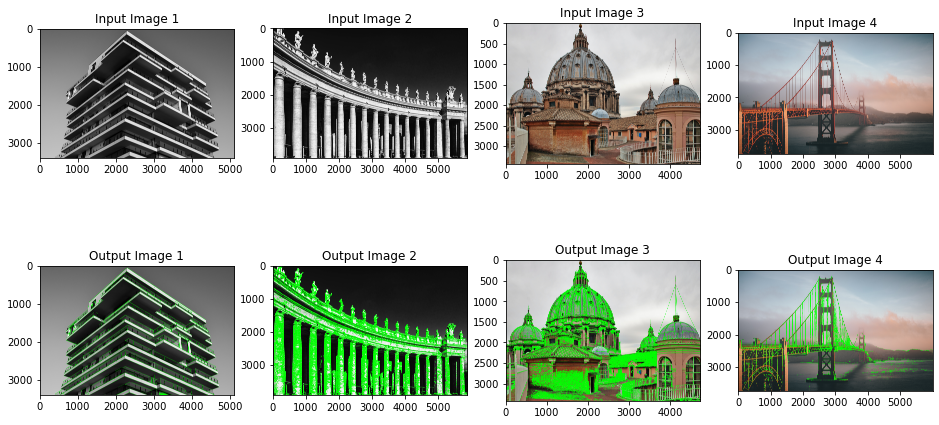

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define function to detect and draw lines
def detect_lines(image_path):
    # Read image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use canny edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Apply HoughLinesP method to
    # to directly obtain line end points
    lines_list =[]
    lines = cv2.HoughLinesP(
                edges, # Input edge image
                1, # Distance resolution in pixels
                np.pi/180, # Angle resolution in radians
                threshold=100, # Min number of votes for valid line
                minLineLength=5, # Min allowed length of line
                maxLineGap=10 # Max allowed gap between line for joining them
                )

    # Iterate over points
    for points in lines:
        # Extracted points nested in the list
        x1,y1,x2,y2=points[0]
        # Draw the lines joing the points
        # On the original image
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
        # Maintain a simples lookup list for points
        lines_list.append([(x1,y1),(x2,y2)])

    # Return the result image
    return image

# Read 4 input images and detect lines
image1 = detect_lines('photo1.jpg')
image2 = detect_lines('photo2.jpg')
image3 = detect_lines('photo3.jpg')
image4 = detect_lines('photo4.jpg')

# Display input images and output images using Matplotlib
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes[0, 0].imshow(cv2.cvtColor(cv2.imread('photo1.jpg'), cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Input Image 1')
axes[0, 1].imshow(cv2.cvtColor(cv2.imread('photo2.jpg'), cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Input Image 2')
axes[0, 2].imshow(cv2.cvtColor(cv2.imread('photo3.jpg'), cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Input Image 3')
axes[0, 3].imshow(cv2.cvtColor(cv2.imread('photo4.jpg'), cv2.COLOR_BGR2RGB))
axes[0, 3].set_title('Input Image 4')
axes[1, 0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Output Image 1')
axes[1, 1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Output Image 2')
axes[1, 2].imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Output Image 3')
axes[1, 3].imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
axes[1, 3].set_title('Output Image 4')
plt.show()
